In [2]:
import sys
from tqdm.auto import tqdm
sys.version

#sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

'3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) \n[GCC 7.3.0]'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
import lmfit

#sys.path.append(r'C:\Users\andre\Documents\Spot-On-cli')

import fastspt as fs
from fastspt import fit2, readers, matimport, tracklen
%load_ext autoreload

%autoreload 2

# print("Using fastspt version {}".format(fs.version.__version__))

import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [4]:
import os
os.getcwd()

'/home/jovian/andrey/Documents/Spot-On-Cli'

In [6]:
from glob import glob

In [9]:
# Specify folder location and search for .mat files
folder = r"../../Dropbox/forAndrey/"

data_paths = glob(folder + "*today*.mat")

In [10]:
# List found files
data_paths

['../../Dropbox/forAndrey/todaytracks.mat']

In [11]:
# Next, you need to choose, how to concatenate the datasets
concatenation_modes = {
    'all_together': matimport.concat_all,
    'by_replicates': matimport.concat_reps
}

In [12]:
def run_analysis_mat_2(data_path, n_lags=5, plot=False):
    
    all_exp = matimport.read_gizem_mat(data_path)
    #print(f'open `{data_path}`')
    #print(f'Discovered {len(all_exp)} replicates, with {[len(acq) for acq in all_exp]} experiments, each experiment contains {len(all_exp[0][0][0])} columns')
    

    pixel_size_um = 0.075
    exposure_ms = 60

    if all_exp:
        reps = matimport.concat_reps(all_exp,
                                                      exposure_ms=exposure_ms,
                                                      pixel_size_um=pixel_size_um)
        print(f'Returning {len(reps)} replicates')
        
    fit_results2 = [fit2.fit_spoton_2_0(
        tracks=rep,
        path=data_path,
        n_lags=n_lags,
        n_bins=100,
        plot=plot,
        dt=exposure_ms / 1000,
        D=(0.000005, 0.1),
        fit_D=(True, True),
        F=(0.3, 0.7),
        fit_F=(True, True),
    ) for rep in tqdm(reps)]
    
    table = fit2.result_2_table(*fit_results2)
    table.to_csv(data_path.replace('.mat', f'_{n_lags}_lags_2_states.csv'))
    return table

In [13]:
def run_analysis_mat_3(data_path, n_lags=5, plot=False):
    
    
    all_exp = matimport.read_gizem_mat(data_path)
    print(f'open `{data_path}`')
    print(f'Discovered {len(all_exp)} replicates, with {[len(acq) for acq in all_exp]} experiments, each experiment contains {len(all_exp[0][0][0])} columns')
    
    pixel_size_um = 0.075
    exposure_ms = 60

    if all_exp:
        reps = matimport.concat_reps(all_exp,
                                                      exposure_ms=exposure_ms,
                                                      pixel_size_um=pixel_size_um)
        print(f'Returning {len(reps)} replicates')
        
    fit_results3 = [fit2.fit_spoton_2_0(
        tracks=rep,
        path=data_path,
        n_lags=n_lags,
        n_bins=100,
        plot=plot,
        dt=exposure_ms / 1000,
        D=(0.000005, 0.1, 0.5),
        fit_D=(True, True, True),
        F=(0.3, 0.3, 0.4),
        fit_F=(True, True, True),
    ) for rep in tqdm(reps)]
    
    table = fit2.result_2_table(*fit_results3)
    table.to_csv(data_path.replace('.mat', f'_{n_lags}_lags_3_states.csv'))
    return table

In [14]:
def run_analysis_mat_4(data_path, n_lags=5, plot=False):
    
    
    all_exp = matimport.read_gizem_mat(data_path)
    print(f'open `{data_path}`')
    print(f'Discovered {len(all_exp)} replicates, with {[len(acq) for acq in all_exp]} experiments, each experiment contains {len(all_exp[0][0][0])} columns')
    
    pixel_size_um = 0.075
    exposure_ms = 60

    if all_exp:
        reps = matimport.concat_reps(all_exp,
                                                      exposure_ms=exposure_ms,
                                                      pixel_size_um=pixel_size_um)
        print(f'Returning {len(reps)} replicates')
        
    fit_results4 = [fit2.fit_spoton_2_0(
        tracks=rep,
        path=data_path,
        n_lags=n_lags,
        n_bins=100,
        plot=plot,
        dt=exposure_ms / 1000,
        D=(0.000005, 0.1, 0.3,0.5),
        fit_D=(True, True, True, True),
        F=(0.3, 0.3, 0.2, 0.2),
        fit_F=(True, True, True, True),
    ) for rep in tqdm(reps)]
    
    table = fit2.result_2_table(*fit_results4)
    table.to_csv(data_path.replace('.mat', f'_{n_lags}_lags_4_states.csv'))
    return table

In [15]:
def plot_mat_2(data_path, n_lags=5, plot=True, x_lim=0.6):
    
    
    all_exp = matimport.read_gizem_mat(data_path)
    #print(f'open `{data_path}`')
    #print(f'Discovered {len(all_exp)} replicates, with {[len(acq) for acq in all_exp]} experiments, each experiment contains {len(all_exp[0][0][0])} columns')
    

    pixel_size_um = 0.075
    exposure_ms = 60

    if all_exp:
        reps = matimport.concat_reps(all_exp,
                                                      exposure_ms=exposure_ms,
                                                      pixel_size_um=pixel_size_um)
        print(f'Returning {len(reps)} replicates')
            # concat_all or concat_reps

    fit_results2 = [fit2.fit_spoton_2_0(
        tracks=rep,
        path=data_path,
        n_lags=n_lags,
        n_bins=100,
        plot=plot,
        dt=exposure_ms / 1000,
        D=(0.000005, 0.1),
        fit_D=(True, True),
        F=(0.3, 0.7),
        fit_F=(True, True),
        max_um=x_lim,
        figsize=(5,2)
    ) for rep in tqdm(reps)]
    
    table = fit2.result_2_table(*fit_results2)
    dp = data_path.replace('.mat', f'_all_{n_lags}_lags_2_states.csv')
    table.to_csv(dp)
    print(f'Saved csv to {dp}')
    
    ddd = [d['data_from_plots'] for d in fit_results2]
    with open(data_path.replace('.mat', f'_{n_lags}_lags_2_statesPlotData.json'), 'w') as f:
        json.dump(ddd, f)
    
    return table, fit_results2

In [16]:
#def run_analysis_mat_3(data_path, n_lags=5, plot=False):
def plot_mat_3(data_path, n_lags=5, plot=True, x_lim=0.6):
   
    
    all_exp = matimport.read_gizem_mat(data_path)
    print(f'open `{data_path}`')
    print(f'Discovered {len(all_exp)} replicates, with {[len(acq) for acq in all_exp]} experiments, each experiment contains {len(all_exp[0][0][0])} columns')
    
    pixel_size_um = 0.075
    exposure_ms = 60

    if all_exp:
       reps = matimport.concat_reps(all_exp,
                                                    exposure_ms=exposure_ms,
                                                    pixel_size_um=pixel_size_um)

    # concat_all or concat_reps
        #print(f'Returning {len(reps)} replicates')
        
    fit_results3 = [fit2.fit_spoton_2_0(
        tracks=rep,
        path=data_path,
        n_lags=n_lags,
        n_bins=100,
        plot=plot,
        dt=exposure_ms / 1000,
        D=(0.000005, 0.1, 0.5),
        fit_D=(True, True, True),
        F=(0.3, 0.3, 0.4),
        fit_F=(True, True, True),
        max_um=x_lim,
        figsize=(5,2)
    ) for rep in tqdm(reps)]
    
    table = fit2.result_2_table(*fit_results3)
    dp = data_path.replace('.mat', f'all__{n_lags}_lags_3_states.csv')
    table.to_csv(dp)
    print(f'Saved csv to {dp}')
    
    ddd = [d['data_from_plots'] for d in fit_results3]
    with open(data_path.replace('.mat', f'_{n_lags}_lags_3_statesPlotData.json'), 'w') as f:
        json.dump(ddd, f)
    
    return table, fit_results3

In [17]:
fits2 = [run_analysis_mat_2(p, plot=False) for p in tqdm(data_paths)]
fits3 = [run_analysis_mat_3(p, plot=False) for p in tqdm(data_paths)]
fits4 = [run_analysis_mat_4(p, plot=False) for p in tqdm(data_paths)]

discovered 12 replicates containing [4, 6, 9, 6, 5, 8, 8, 7, 7, 9, 10, 10]         acquisitions
Assembling tracks with minimal length 3,         using exposure 60 ms and px size 0.075 µm


1120  tracks 
740  tracks 
1413  tracks 
1713  tracks 

Replicate 1: Total 4986 tracks


791  tracks 
732  tracks 
547  tracks 
591  tracks 
659  tracks 
467  tracks 

Replicate 2: Total 3787 tracks


1007  tracks 
1026  tracks 
887  tracks 
701  tracks 
775  tracks 
837  tracks 
962  tracks 
1070  tracks 
861  tracks 

Replicate 3: Total 8126 tracks


1661  tracks 
1884  tracks 
1967  tracks 
1696  tracks 
1711  tracks 
1904  tracks 

Replicate 4: Total 10823 tracks


1079  tracks 
1791  tracks 
1008  tracks 
338  tracks 
1069  tracks 

Replicate 5: Total 5285 tracks


613  tracks 
326  tracks 
417  tracks 
515  tracks 
299  tracks 
388  tracks 
407  tracks 
1287  tracks 

Replicate 6: Total 4252 tracks


771  tracks 
519  tracks 
388  tracks 
356  tracks 
346  tracks 
343  tracks 
519  tracks 
1100  tracks 

Replicate 7: Total 4342 tracks


1372  tracks 
1438  tracks 
1362  tracks 
1100  tracks 
722  tracks 
243  tracks 
1441  tracks 

Replicate 8: Total 7678 tracks


1543  tracks 
1560  tracks 
1541  tracks 
1926  tracks 
1447  tracks 
1321  tracks 
1518  tracks 

Replicate 9: Total 10856 tracks


684  tracks 
476  tracks 
630  tracks 
504  tracks 
691  tracks 
416  tracks 
687  tracks 
469  tracks 
564  tracks 

Replicate 10: Total 5121 tracks


417  tracks 
694  tracks 
902  tracks 
1022  tracks 
1159  tracks 
971  tracks 
585  tracks 
496  tracks 
502  tracks 
585  tracks 

Replicate 11: Total 7333 tracks


872  tracks 
818  tracks 
1212  tracks 
744  tracks 
590  tracks 
974  tracks 
729  tracks 
875  tracks 
1023  tracks 
667  tracks 

Replicate 12: Total 8504 tracks

Returning 12 replicates


open `../../Dropbox/forAndrey/todaytracks.mat`
Discovered 12 replicates, with [4, 6, 9, 6, 5, 8, 8, 7, 7, 9, 10, 10] experiments, each experiment contains 4 columns
discovered 12 replicates containing [4, 6, 9, 6, 5, 8, 8, 7, 7, 9, 10, 10]         acquisitions
Assembling tracks with minimal length 3,         using exposure 60 ms and px size 0.075 µm


1120  tracks 
740  tracks 
1413  tracks 
1713  tracks 

Replicate 1: Total 4986 tracks


791  tracks 
732  tracks 
547  tracks 
591  tracks 
659  tracks 
467  tracks 

Replicate 2: Total 3787 tracks


1007  tracks 
1026  tracks 
887  tracks 
701  tracks 
775  tracks 
837  tracks 
962  tracks 
1070  tracks 
861  tracks 

Replicate 3: Total 8126 tracks


1661  tracks 
1884  tracks 
1967  tracks 
1696  tracks 
1711  tracks 
1904  tracks 

Replicate 4: Total 10823 tracks


1079  tracks 
1791  tracks 
1008  tracks 
338  tracks 
1069  tracks 

Replicate 5: Total 5285 tracks


613  tracks 
326  tracks 
417  tracks 
515  tracks 
299  tracks 
388  tracks 
407  tracks 
1287  tracks 

Replicate 6: Total 4252 tracks


771  tracks 
519  tracks 
388  tracks 
356  tracks 
346  tracks 
343  tracks 
519  tracks 
1100  tracks 

Replicate 7: Total 4342 tracks


1372  tracks 
1438  tracks 
1362  tracks 
1100  tracks 
722  tracks 
243  tracks 
1441  tracks 

Replicate 8: Total 7678 tracks


1543  tracks 
1560  tracks 
1541  tracks 
1926  tracks 
1447  tracks 
1321  tracks 
1518  tracks 

Replicate 9: Total 10856 tracks


684  tracks 
476  tracks 
630  tracks 
504  tracks 
691  tracks 
416  tracks 
687  tracks 
469  tracks 
564  tracks 

Replicate 10: Total 5121 tracks


417  tracks 
694  tracks 
902  tracks 
1022  tracks 
1159  tracks 
971  tracks 
585  tracks 
496  tracks 
502  tracks 
585  tracks 

Replicate 11: Total 7333 tracks


872  tracks 
818  tracks 
1212  tracks 
744  tracks 
590  tracks 
974  tracks 
729  tracks 
875  tracks 
1023  tracks 
667  tracks 

Replicate 12: Total 8504 tracks

Returning 12 replicates


open `../../Dropbox/forAndrey/todaytracks.mat`
Discovered 12 replicates, with [4, 6, 9, 6, 5, 8, 8, 7, 7, 9, 10, 10] experiments, each experiment contains 4 columns
discovered 12 replicates containing [4, 6, 9, 6, 5, 8, 8, 7, 7, 9, 10, 10]         acquisitions
Assembling tracks with minimal length 3,         using exposure 60 ms and px size 0.075 µm


1120  tracks 
740  tracks 
1413  tracks 
1713  tracks 

Replicate 1: Total 4986 tracks


791  tracks 
732  tracks 
547  tracks 
591  tracks 
659  tracks 
467  tracks 

Replicate 2: Total 3787 tracks


1007  tracks 
1026  tracks 
887  tracks 
701  tracks 
775  tracks 
837  tracks 
962  tracks 
1070  tracks 
861  tracks 

Replicate 3: Total 8126 tracks


1661  tracks 
1884  tracks 
1967  tracks 
1696  tracks 
1711  tracks 
1904  tracks 

Replicate 4: Total 10823 tracks


1079  tracks 
1791  tracks 
1008  tracks 
338  tracks 
1069  tracks 

Replicate 5: Total 5285 tracks


613  tracks 
326  tracks 
417  tracks 
515  tracks 
299  tracks 
388  tracks 
407  tracks 
1287  tracks 

Replicate 6: Total 4252 tracks


771  tracks 
519  tracks 
388  tracks 
356  tracks 
346  tracks 
343  tracks 
519  tracks 
1100  tracks 

Replicate 7: Total 4342 tracks


1372  tracks 
1438  tracks 
1362  tracks 
1100  tracks 
722  tracks 
243  tracks 
1441  tracks 

Replicate 8: Total 7678 tracks


1543  tracks 
1560  tracks 
1541  tracks 
1926  tracks 
1447  tracks 
1321  tracks 
1518  tracks 

Replicate 9: Total 10856 tracks


684  tracks 
476  tracks 
630  tracks 
504  tracks 
691  tracks 
416  tracks 
687  tracks 
469  tracks 
564  tracks 

Replicate 10: Total 5121 tracks


417  tracks 
694  tracks 
902  tracks 
1022  tracks 
1159  tracks 
971  tracks 
585  tracks 
496  tracks 
502  tracks 
585  tracks 

Replicate 11: Total 7333 tracks


872  tracks 
818  tracks 
1212  tracks 
744  tracks 
590  tracks 
974  tracks 
729  tracks 
875  tracks 
1023  tracks 
667  tracks 

Replicate 12: Total 8504 tracks

Returning 12 replicates


In [ ]:
table

open `../../Dropbox/forAndrey/todaytracks.mat`
Discovered 2 replicates, with [4, 6] experiments, each experiment contains 4 columns
discovered 2 replicates containing [4, 6]         acquisitions
Assembling tracks with minimal length 3,         using exposure 60 ms and px size 0.075 µm


1120  tracks 
740  tracks 
1413  tracks 
1713  tracks 

Replicate 1: Total 4986 tracks


791  tracks 
732  tracks 
547  tracks 
591  tracks 
659  tracks 
467  tracks 

Replicate 2: Total 3787 tracks

Returning 2 replicates


In [ ]:
fits = [run_analysis_mat_3(p, plot=False) for p in tqdm(data_paths)]

In [14]:
data_paths

['../../Dropbox/forAndrey/todaytracks.mat']

discovered 6 replicates containing [5, 7, 5, 6, 5, 7]         acquisitions
Assembling tracks with minimal length 3,         using exposure 60 ms and px size 0.075 µm


114  tracks 
389  tracks 
186  tracks 
316  tracks 
415  tracks 



547  tracks 
505  tracks 
535  tracks 
195  tracks 
507  tracks 
473  tracks 
546  tracks 



227  tracks 
443  tracks 
318  tracks 
229  tracks 
139  tracks 



452  tracks 
287  tracks 
396  tracks 
476  tracks 
461  tracks 
461  tracks 



882  tracks 
736  tracks 
672  tracks 
782  tracks 
734  tracks 



402  tracks 
373  tracks 
332  tracks 
435  tracks 
469  tracks 
416  tracks 
522  tracks 


Total 15372 tracks
Returning 1 replicates


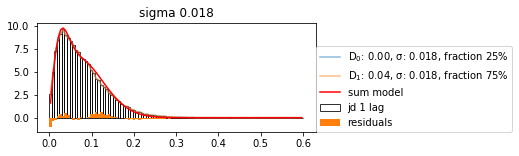

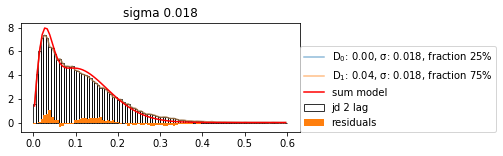

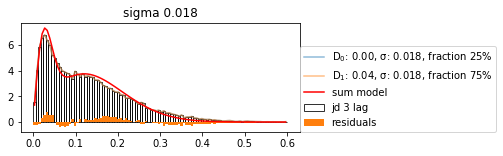

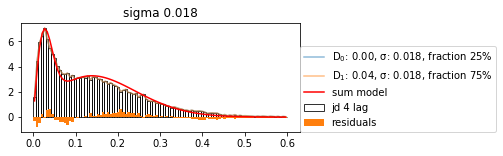

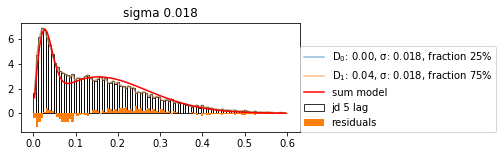


Saved csv to ../../Dropbox/forAndrey/WTforAndrey_all_5_lags_2_states.csv


In [13]:
import json 
table, fits = plot_mat_2(data_paths[0], x_lim=0.6)
#
table, fits = plot_mat_3(data_paths[0], x_lim=0.6)

In [15]:
table

,sigma_0,D_0,D_1,D_2,F_0,F_1,F_2,dt,n_tracks,chi2,chi2_norm,n_iter,path
replicate,,,,,,,,,,,,,
0,0.016685,0.0,0.016608,0.056295,0.216019,0.272949,0.511032,0.06,15372,13.734085,0.027468,57,../../Dropbox/forAndrey/WTforAndrey.mat


## Show Results

### 2 states

In [11]:
_ = [display(f) for f in fits2]

,sigma_0,D_0,D_1,F_0,F_1,dt,n_tracks,chi2,chi2_norm,n_iter,path
replicate,,,,,,,,,,,
0,0.016654,0.0,0.022359,0.479452,0.520548,0.06,5011,121.320584,0.242641,37,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat
1,0.013876,0.0,0.028798,0.624255,0.375745,0.06,1247,153.915032,0.307830,45,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat
2,0.017410,0.0,0.027864,0.453976,0.546024,0.06,2158,75.498084,0.150996,29,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat
3,0.016499,0.0,0.025290,0.447469,0.552531,0.06,2409,69.278685,0.138557,29,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat


,sigma_0,D_0,D_1,F_0,F_1,dt,n_tracks,chi2,chi2_norm,n_iter,path
replicate,,,,,,,,,,,
0,0.016654,0.0,0.022359,0.479452,0.520548,0.06,5011,121.320584,0.242641,37,../../Dropbox/forAndrey/GFPdata/av127tracks.mat
1,0.013876,0.0,0.028798,0.624255,0.375745,0.06,1247,153.915032,0.307830,45,../../Dropbox/forAndrey/GFPdata/av127tracks.mat
2,0.017410,0.0,0.027864,0.453976,0.546024,0.06,2158,75.498084,0.150996,29,../../Dropbox/forAndrey/GFPdata/av127tracks.mat
3,0.016499,0.0,0.025290,0.447469,0.552531,0.06,2409,69.278685,0.138557,29,../../Dropbox/forAndrey/GFPdata/av127tracks.mat


### 3 states

In [12]:
_ = [display(f) for f in fits]

,sigma_0,D_0,D_1,D_2,F_0,F_1,F_2,dt,n_tracks,chi2,chi2_norm,n_iter,path
replicate,,,,,,,,,,,,,
0,0.016274,0.0,0.013129,0.042128,0.453248,0.309730,0.237022,0.06,5011,113.007976,0.226016,84,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat
1,0.013461,0.0,0.006566,0.042444,0.583799,0.131797,0.284403,0.06,1247,137.513091,0.275026,69,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat
2,0.017009,0.0,0.012356,0.038610,0.428331,0.193229,0.378440,0.06,2158,69.513582,0.139027,50,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat
3,0.016263,0.0,0.017007,0.045444,0.431408,0.342222,0.226370,0.06,2409,64.446221,0.128892,71,../../Dropbox/forAndrey/GFPdata/av127Btracks.mat


,sigma_0,D_0,D_1,D_2,F_0,F_1,F_2,dt,n_tracks,chi2,chi2_norm,n_iter,path
replicate,,,,,,,,,,,,,
0,0.016274,0.0,0.013129,0.042128,0.453248,0.309730,0.237022,0.06,5011,113.007976,0.226016,84,../../Dropbox/forAndrey/GFPdata/av127tracks.mat
1,0.013461,0.0,0.006566,0.042444,0.583799,0.131797,0.284403,0.06,1247,137.513091,0.275026,69,../../Dropbox/forAndrey/GFPdata/av127tracks.mat
2,0.017009,0.0,0.012356,0.038610,0.428331,0.193229,0.378440,0.06,2158,69.513582,0.139027,50,../../Dropbox/forAndrey/GFPdata/av127tracks.mat
3,0.016263,0.0,0.017007,0.045444,0.431408,0.342222,0.226370,0.06,2409,64.446221,0.128892,71,../../Dropbox/forAndrey/GFPdata/av127tracks.mat


In [183]:
len(reps[0])

1420

In [130]:
reps[0][0]

     x [um]    y [um]  t [sec]  frame []
0  9.295717  9.241638     0.18       3.0
1  9.368376  9.146262     0.24       4.0
2  9.338401  9.102744     0.30       5.0
3  9.338401  9.102744     0.36       6.0
4  9.333486  9.116270     0.42       7.0
5  9.332670  9.210854     0.48       8.0

# 2. Track lengths analysis

15372 tracks, 85639 localizations
Fit result: 21414.86 * e^(-x/2.07) + 129.00


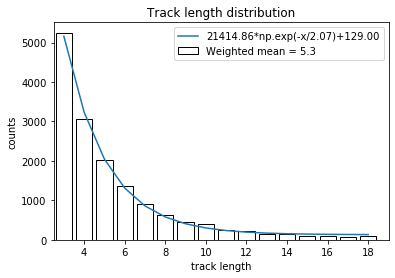

In [167]:
for rep in reps:
    tracklen.get_track_lengths_dist(rep, plot=True)

# 3. multi-state fits

## Fit 2 states


In [13]:
#one Δt: n_lags = 1

fit_results = [fit2.fit_spoton_2_0(
    tracks=rep,
    n_lags=1,
    plot=True,
    dt=exposure_ms / 1000,
    max_um=0.2
) for rep in tqdm(reps)]

NameError: name 'reps' is not defined

In [190]:
fit_results

[{'sigma': [0.014880809197350709],
  'D': [0.0, 0.039350874717968054],
  'F': [0.21700563454499494, 0.7829943654550051],
  'dt': 0.06,
  'fit_result': <lmfit.minimizer.MinimizerResult at 0x7fd9ed33b518>,
  'n_tracks': 1420,
  'chi2': 6.07295438912079,
  'chi2_norm': 0.1214590877824158,
  'n_iter': 53,
  'path': None},
 {'sigma': [0.01813868617057908],
  'D': [0.0, 0.037508569613276865],
  'F': [0.2536052595507418, 0.7463947404492581],
  'dt': 0.06,
  'fit_result': <lmfit.minimizer.MinimizerResult at 0x7fd9e2277438>,
  'n_tracks': 3308,
  'chi2': 2.5105536690571957,
  'chi2_norm': 0.05021107338114392,
  'n_iter': 45,
  'path': None},
 {'sigma': [0.018579391374687483],
  'D': [0.0, 0.0435437325586685],
  'F': [0.293723701100139, 0.706276298899861],
  'dt': 0.06,
  'fit_result': <lmfit.minimizer.MinimizerResult at 0x7fd9f9579ef0>,
  'n_tracks': 1356,
  'chi2': 1.3712632401814535,
  'chi2_norm': 0.02742526480362907,
  'n_iter': 29,
  'path': None},
 {'sigma': [0.018258219760102386],
  'D':

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:select 305 out of 1420 with length > 6
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.03822908]), array([0.29564649, 0.70435351])), 5 lags


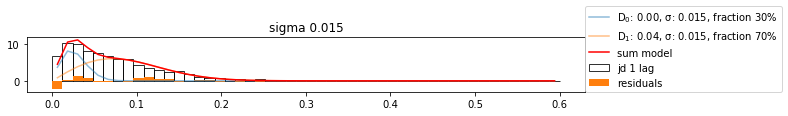

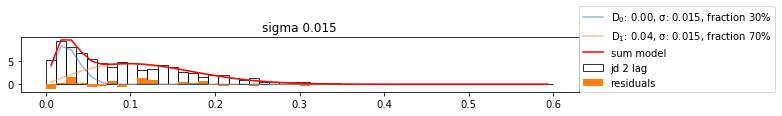

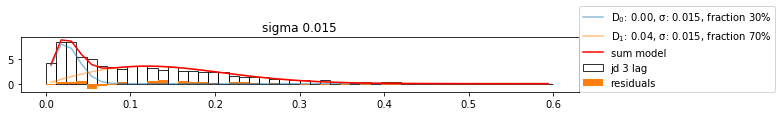

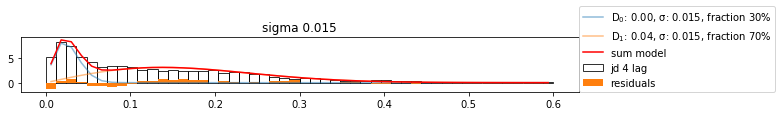

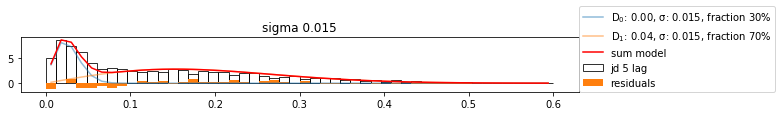

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:select 865 out of 3308 with length > 6
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.03573016]), array([0.24192608, 0.75807392])), 5 lags


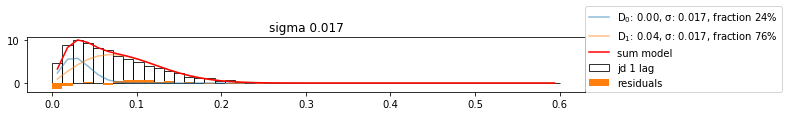

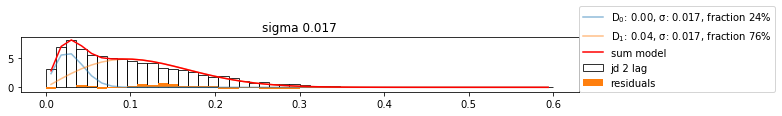

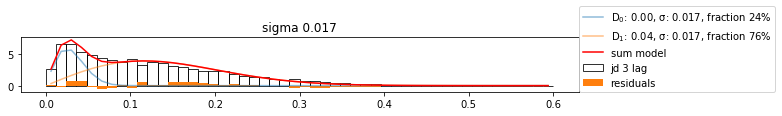

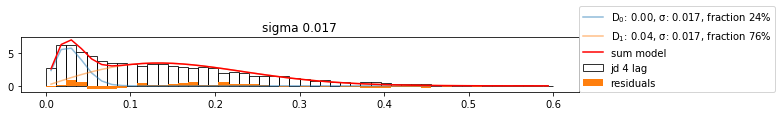

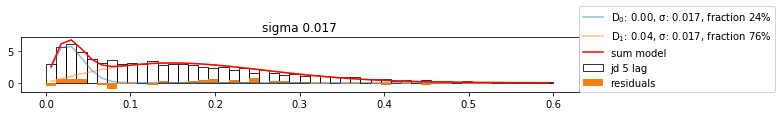

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:select 244 out of 1356 with length > 6
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.04589055]), array([0.32800008, 0.67199992])), 5 lags


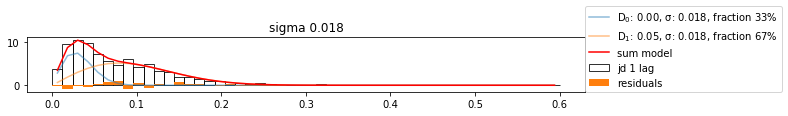

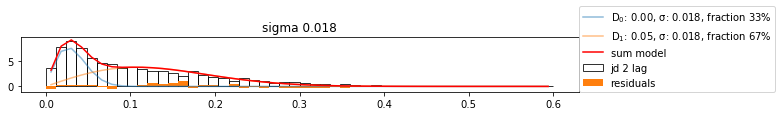

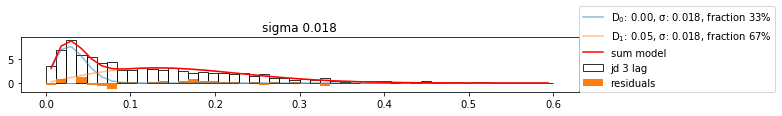

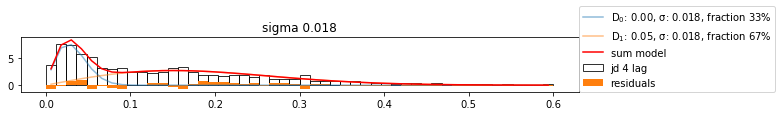

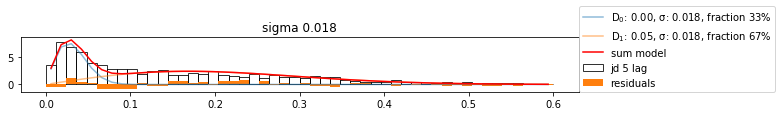

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:select 699 out of 2533 with length > 6
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.03356104]), array([0.24884571, 0.75115429])), 5 lags


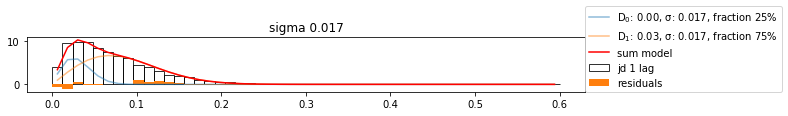

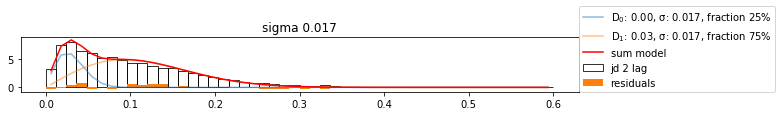

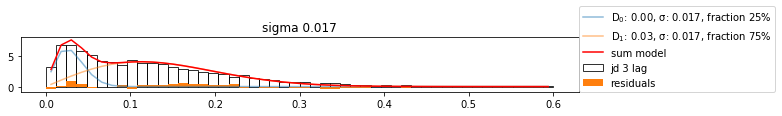

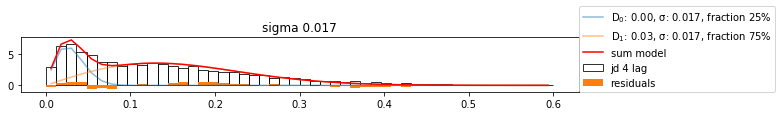

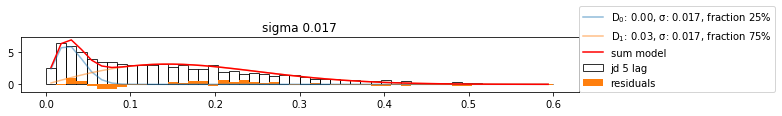

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:select 967 out of 3806 with length > 6
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.03543623]), array([0.27889319, 0.72110681])), 5 lags


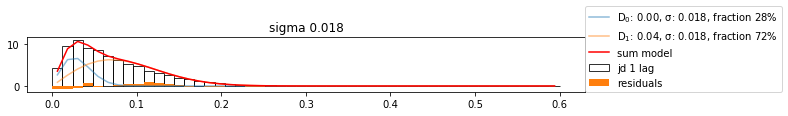

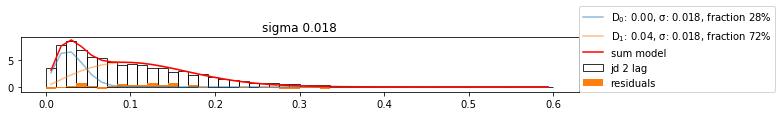

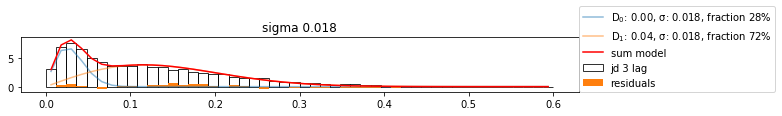

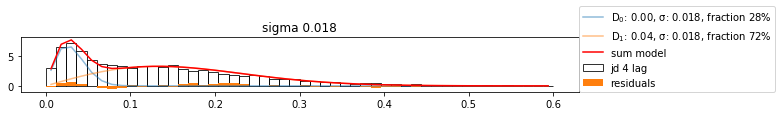

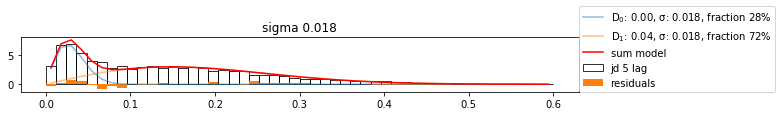

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:select 617 out of 2949 with length > 6
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.04064123]), array([0.28353952, 0.71646048])), 5 lags


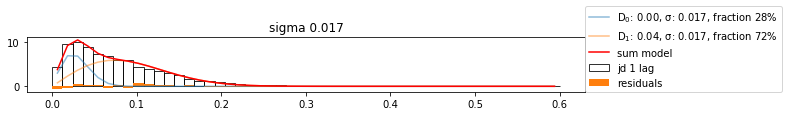

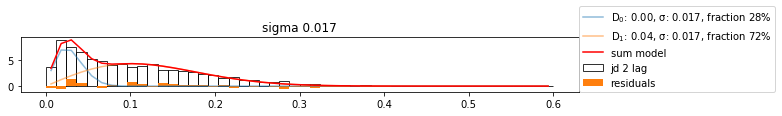

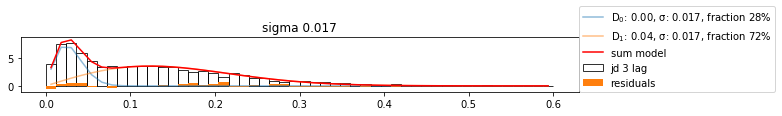

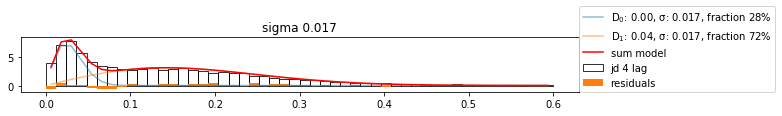

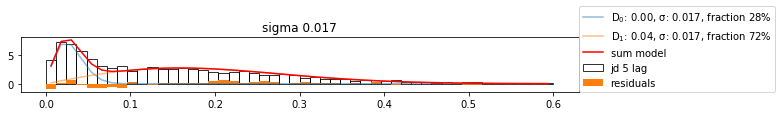

In [188]:
#five Δt: n_lags = 5

fit_results = [fit2.fit_spoton_2_0(
    tracks=rep,
    path=None,
    n_lags=5,
    plot=True,
    dt=exposure_ms / 1000,
) for rep in tqdm(reps)]

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.04038587]), array([0.26317358, 0.73682642])), 5 lags


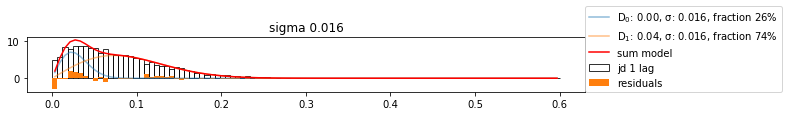

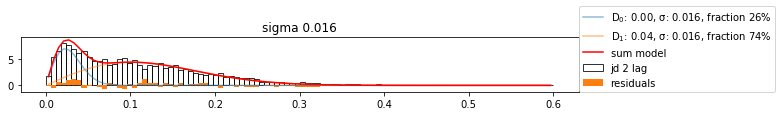

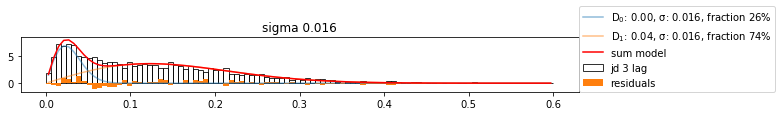

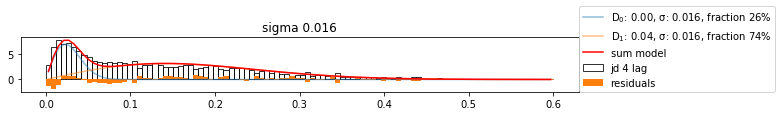

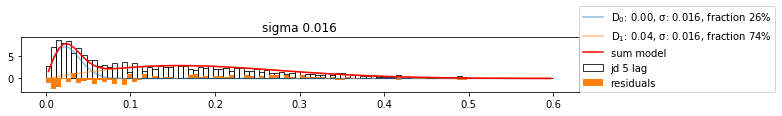

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.03711144]), array([0.2315328, 0.7684672])), 5 lags


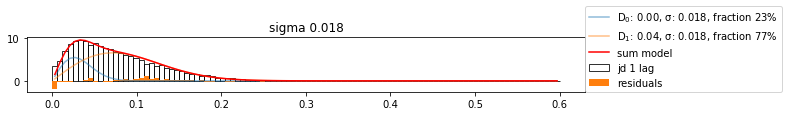

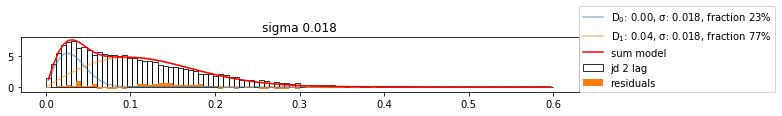

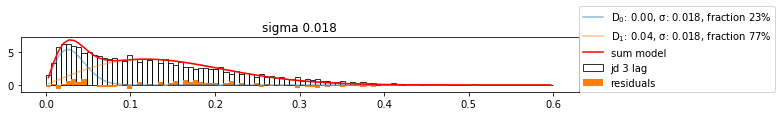

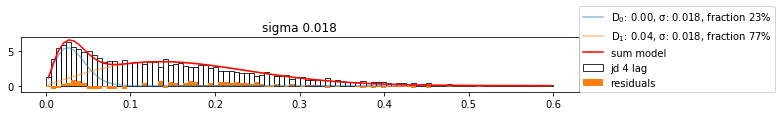

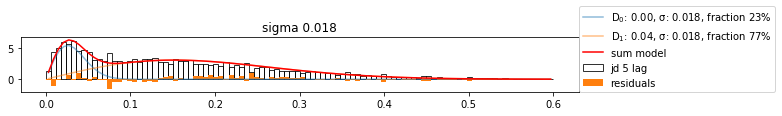

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.04486913]), array([0.29531794, 0.70468206])), 5 lags


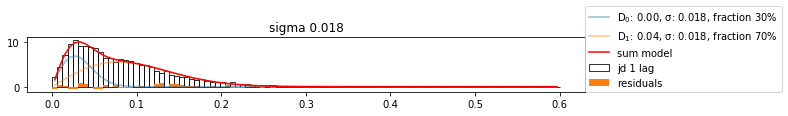

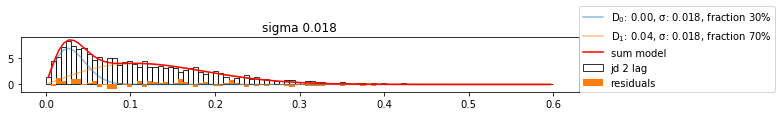

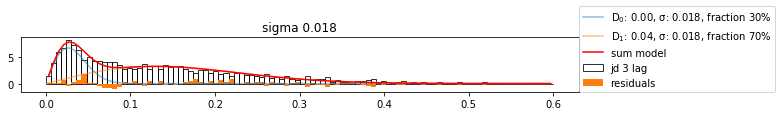

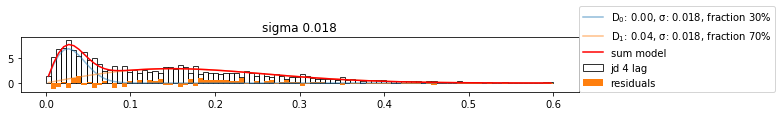

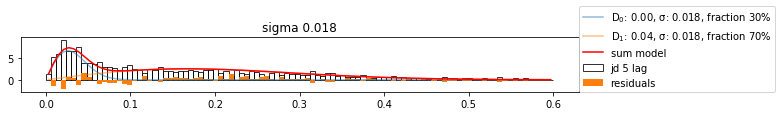

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.       , 0.0351947]), array([0.23836828, 0.76163172])), 5 lags


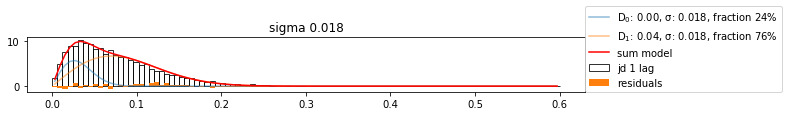

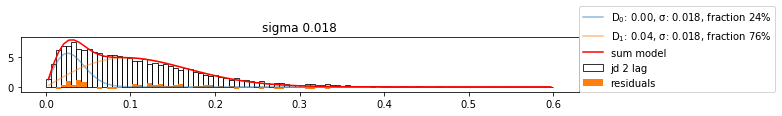

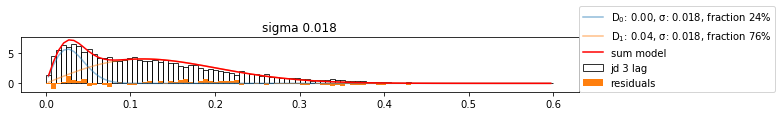

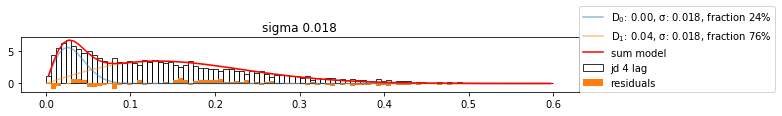

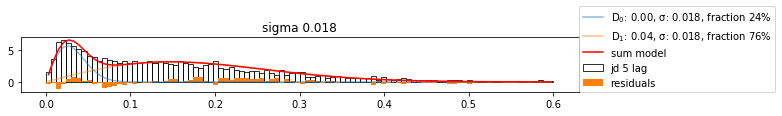

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.03783064]), array([0.25641847, 0.74358153])), 5 lags


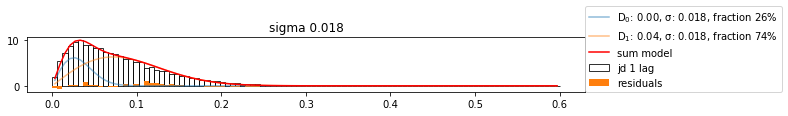

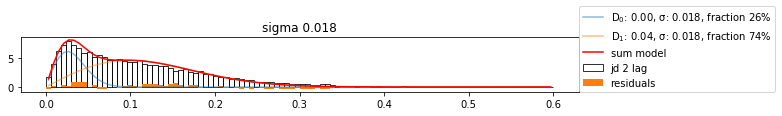

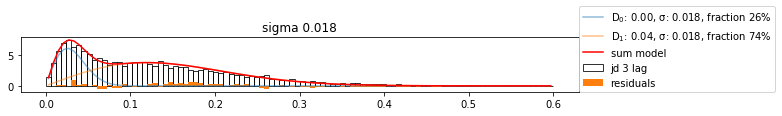

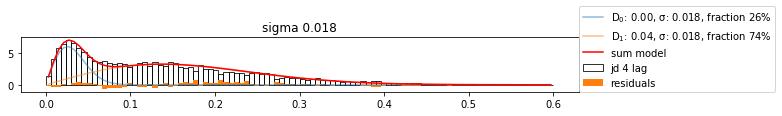

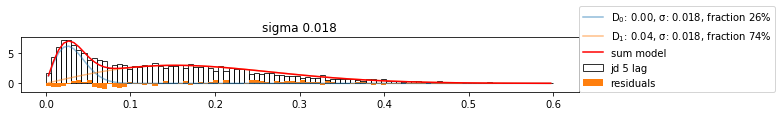

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.04279565]), array([0.25833454, 0.74166546])), 5 lags


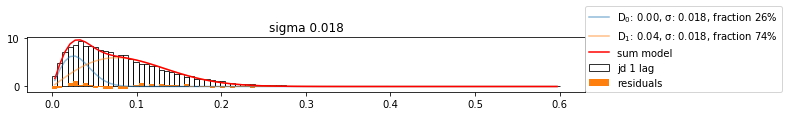

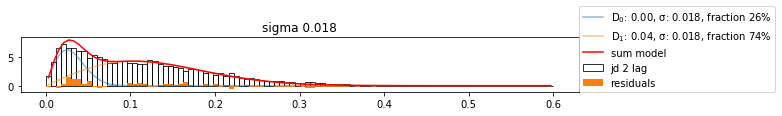

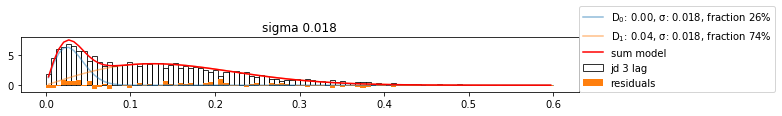

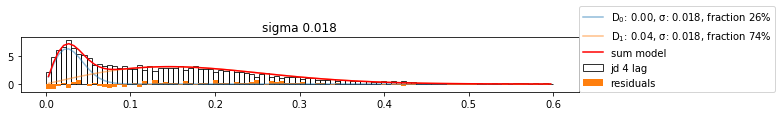

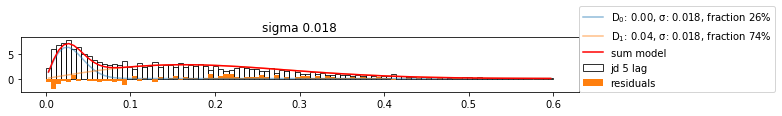

In [191]:
# more bins:

fit_results2 = [fit2.fit_spoton_2_0(
    tracks=rep,
    path=None,
    n_lags=5,
    n_bins=100,
    plot=True,
    dt=exposure_ms / 1000,
) for rep in tqdm(reps)]

In [192]:
fit_results2[0]

{'sigma': [0.016087700043518612],
 'D': [0.0, 0.040385872050580085],
 'F': [0.2631735798170862, 0.7368264201829138],
 'dt': 0.06,
 'fit_result': <lmfit.minimizer.MinimizerResult at 0x7fd9f9c83668>,
 'n_tracks': 1420,
 'chi2': 97.70377098611425,
 'chi2_norm': 0.19540754197222848,
 'n_iter': 41,
 'path': None}

## Fit 3 states

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: ../../Dropbox/forAndrey/WTforAndrey.mat
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.00948536, 0.04787679]), array([0.24676029, 0.14199539, 0.61124433])), 7 lags


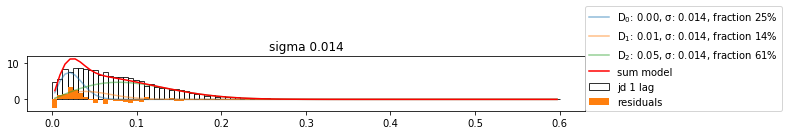

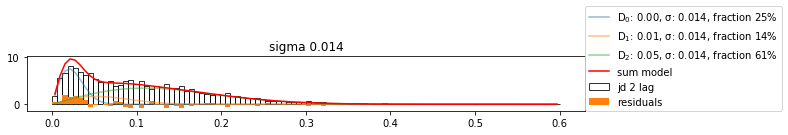

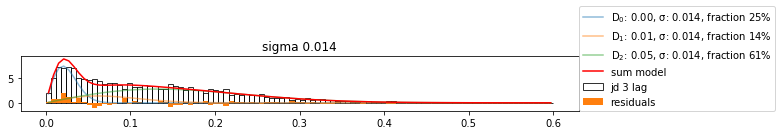

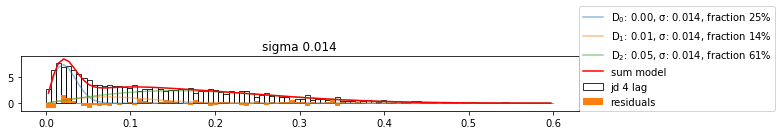

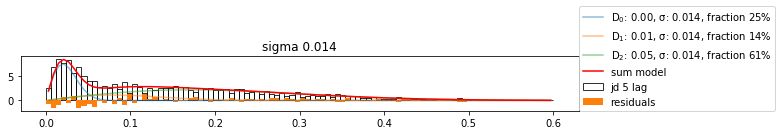

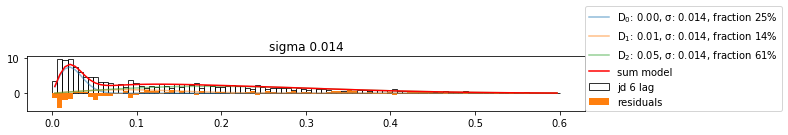

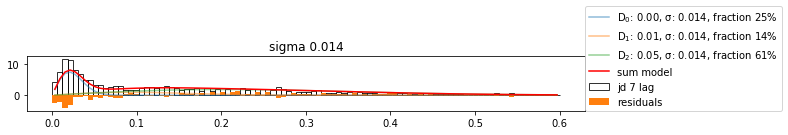

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: ../../Dropbox/forAndrey/WTforAndrey.mat
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.01363364, 0.05195859]), array([0.19967401, 0.24558964, 0.55473635])), 7 lags


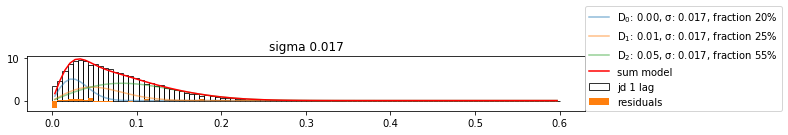

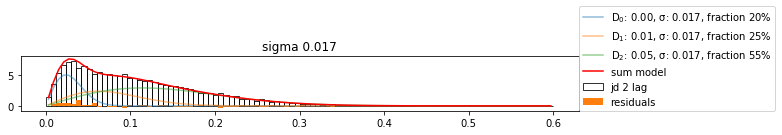

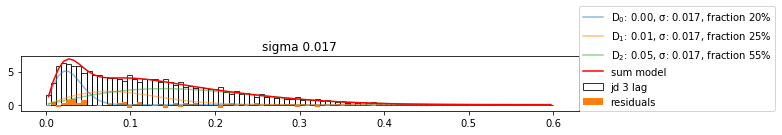

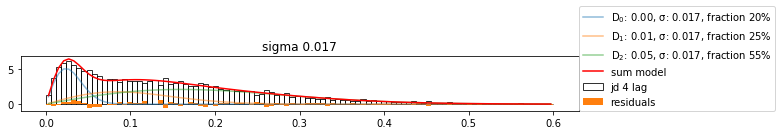

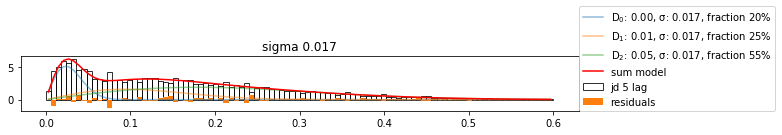

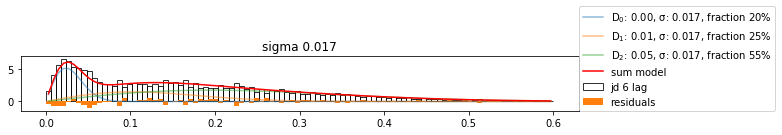

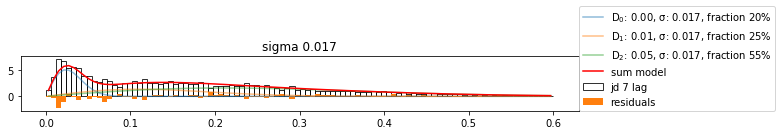

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: ../../Dropbox/forAndrey/WTforAndrey.mat
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.01826044, 0.06512893]), array([0.28689715, 0.22568533, 0.48741753])), 7 lags


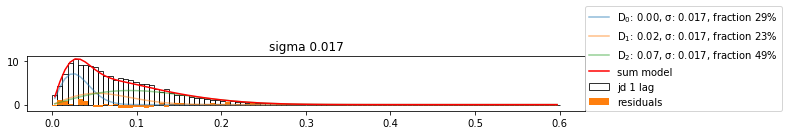

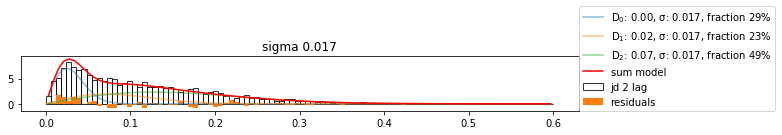

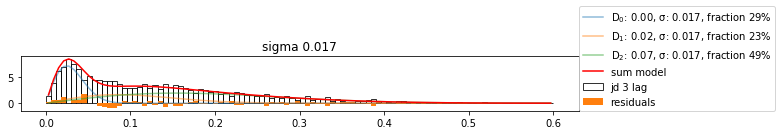

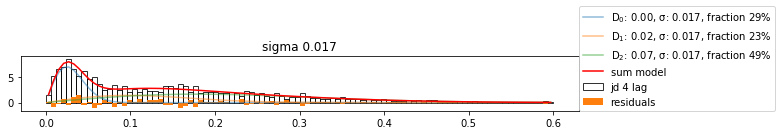

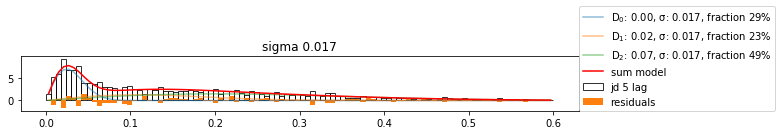

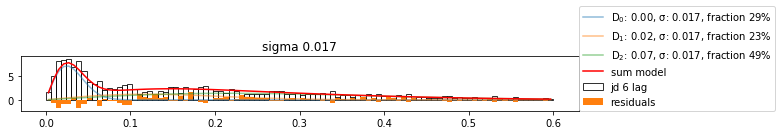

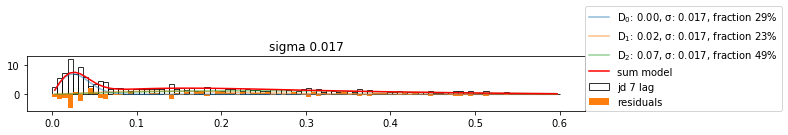

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: ../../Dropbox/forAndrey/WTforAndrey.mat
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.01681548, 0.05575654]), array([0.21218365, 0.3329418 , 0.45487455])), 7 lags


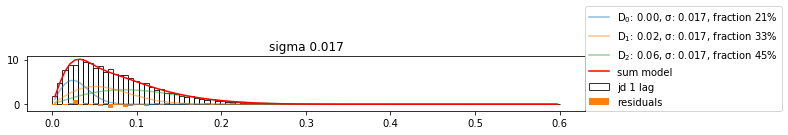

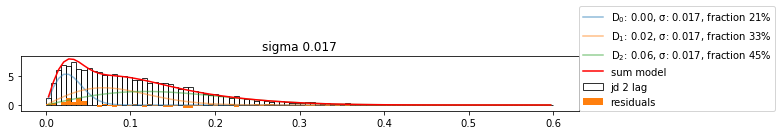

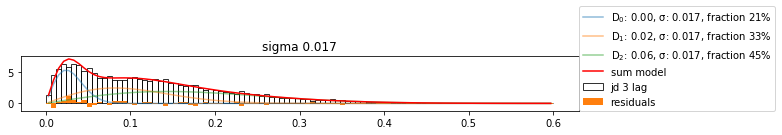

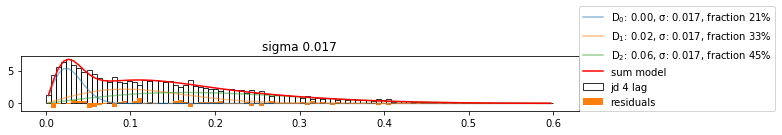

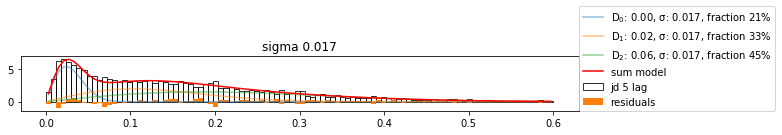

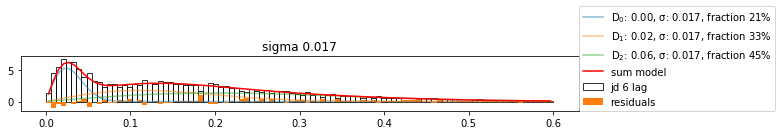

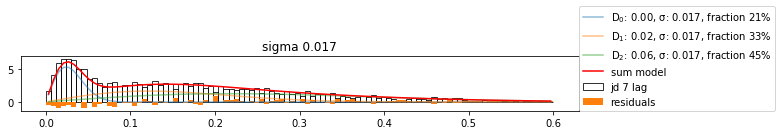

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: ../../Dropbox/forAndrey/WTforAndrey.mat
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.01666043, 0.05276198]), array([0.23742892, 0.26331398, 0.4992571 ])), 7 lags


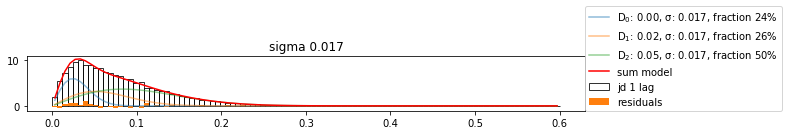

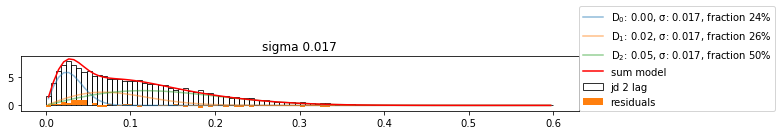

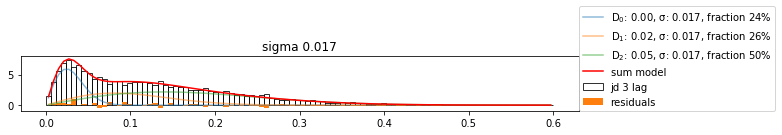

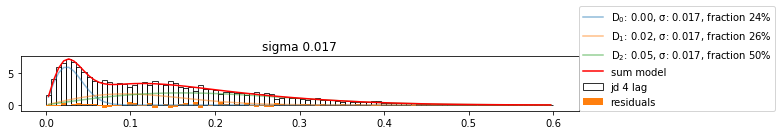

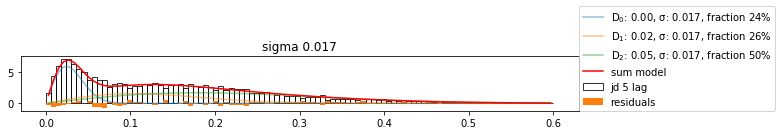

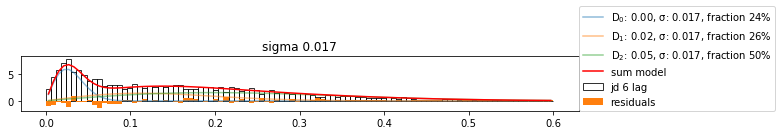

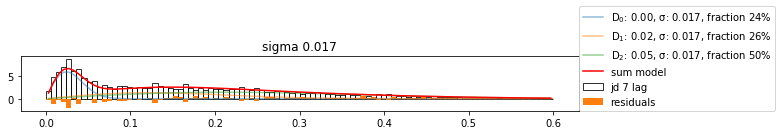

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: ../../Dropbox/forAndrey/WTforAndrey.mat
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.0260674 , 0.07204665]), array([0.25428666, 0.41331016, 0.33240317])), 7 lags


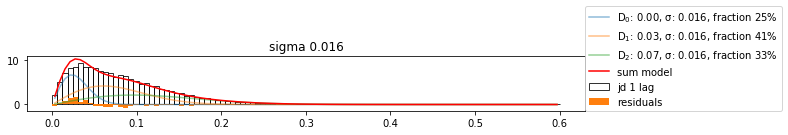

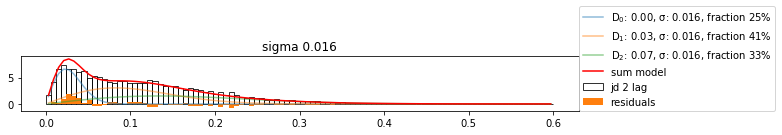

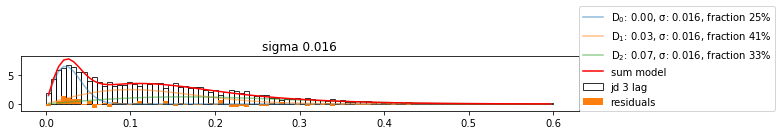

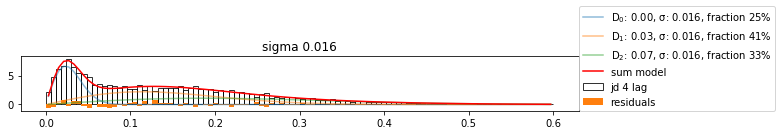

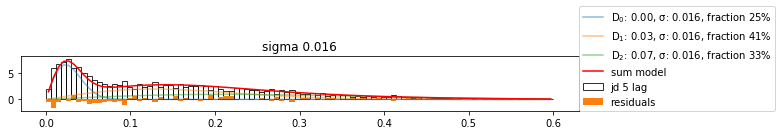

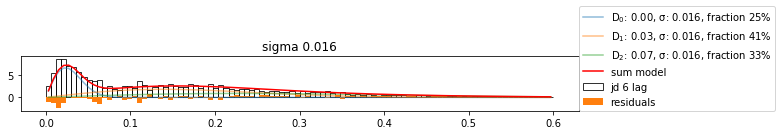

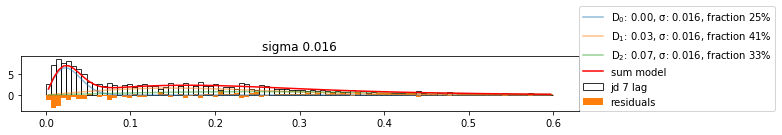

In [196]:
# 3 states

fit_results3 = [fit2.fit_spoton_2_0(
    tracks=rep,
    path=data_path,
    n_lags=7,
    n_bins=100,
    plot=True,
    dt=exposure_ms / 1000,
    D=(0, 0.1, 0.5),
    fit_D=(False, True, True),
    F=(0.3, 0.3, 0.4),
    fit_F=(True, True, True),
) for rep in tqdm(reps)]

In [173]:
fit_results3[0] #note 3 fold reduction of chi2

{'sigma': [0.015403403360226942],
 'D': array([0.        , 0.00926453, 0.04720261]),
 'F': array([0.21787623, 0.18438151, 0.59774226]),
 'dt': 0.06,
 'fit_result': <lmfit.minimizer.MinimizerResult at 0x7fd9e2387fd0>,
 'n_tracks': 3697,
 'chi2': 11.66875243953864,
 'chi2_norm': 0.023337504879077278,
 'n_iter': 129,
 'path': '../../Dropbox/forAndrey/WTforAndrey.mat'}

## Fit 4 states

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.00222658, 0.02256037, 0.06138632]), array([0.17605755, 0.09399982, 0.34553216, 0.38441046])), 5 lags


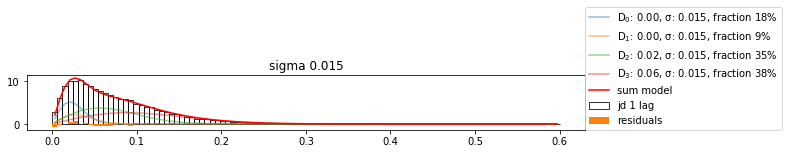

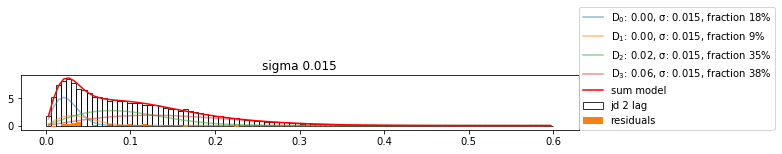

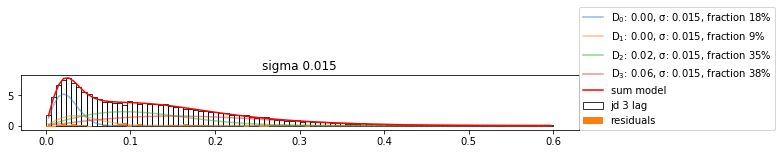

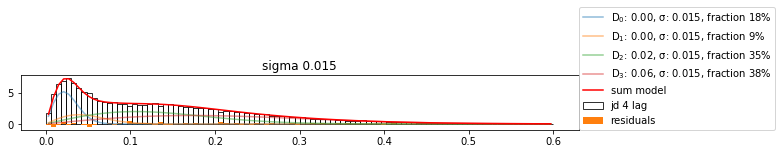

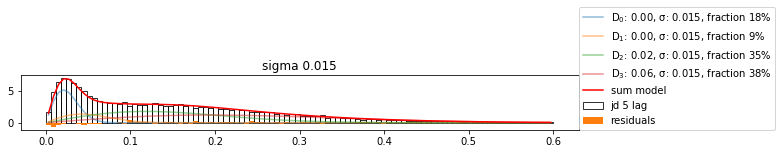

In [174]:
# 4 states

fit_results4 = [fit2.fit_spoton_2_0(
    tracks=rep,
    path=None,
    n_lags=5,
    n_bins=100,
    plot=True,
    dt=exposure_ms / 1000,
    D=(0, 0.1, 0.5, 1.),
    fit_D=(False, True, True, True),
    F=(0.3, 0.3, 0.2, 0.2),
    fit_F=(True, True, True, True),
) for rep in tqdm(reps)]

In [143]:
fit_results4

[{'sigma': [0.014624449119727758],
  'D': array([0.        , 0.00222658, 0.02256037, 0.06138632]),
  'F': array([0.17605755, 0.09399982, 0.34553216, 0.38441046]),
  'dt': 0.06,
  'fit_result': <lmfit.minimizer.MinimizerResult at 0x7fd9ef650048>,
  'n_tracks': 3697,
  'chi2': 8.97837327693721,
  'chi2_norm': 0.01795674655387442,
  'n_iter': 206,
  'path': None}]

## Fit 5 states

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.00215265, 0.02092104, 0.05606351, 0.31047391]), array([0.17548598, 0.09192488, 0.30044765, 0.42184935, 0.01029215])), 5 lags


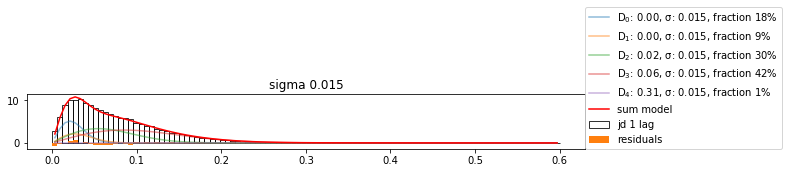

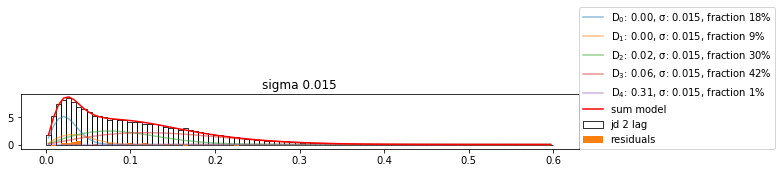

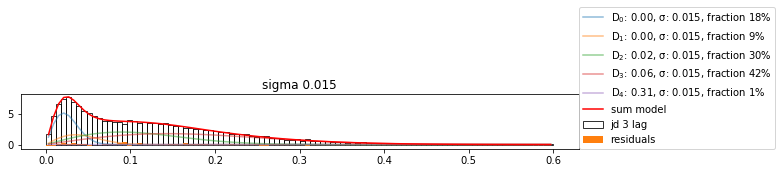

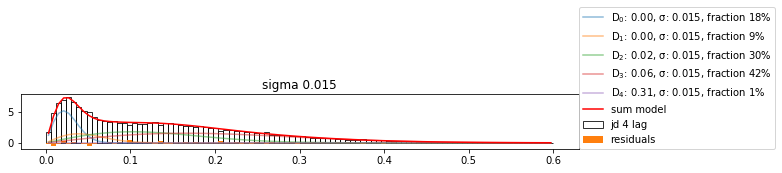

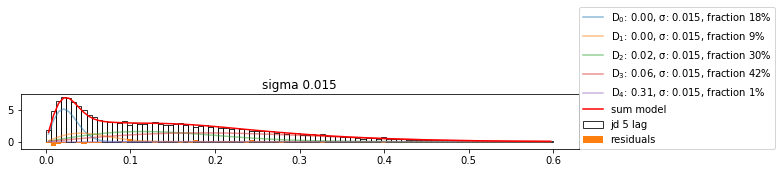

In [175]:
# 5 states

fit_results5 = [fit2.fit_spoton_2_0(
    tracks=rep,
    path=None,
    n_lags=5,
    n_bins=100,
    plot=True,
    dt=exposure_ms / 1000,
    D=(0, 0.1, 0.5, 1., 2.),
    fit_D=(False, True, True, True, True),
    F=(0.3, 0.3, 0.2, 0.1, 0.1),
    fit_F=(True, True, True, True, True),
) for rep in tqdm(reps)]

Text(0, 0.5, 'chi2')

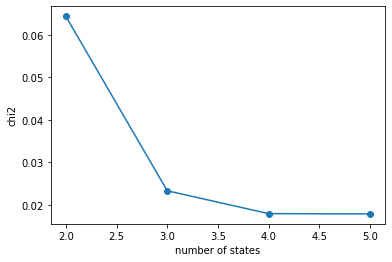

In [176]:
plt.plot([2,3,4, 5], [f[0]['chi2_norm'] for f in [fit_results2, fit_results3, fit_results4, fit_results5]], 'o-')
plt.xlabel('number of states')
plt.ylabel('chi2')

In [195]:
stats = fit2.result_2_table(*fit_results3)
stats

,sigma_0,D_0,D_1,D_2,F_0,F_1,F_2,dt,n_tracks,chi2,chi2_norm,n_iter,path
replicate,,,,,,,,,,,,,
0,0.014880,0.0,0.010675,0.049425,0.226593,0.148261,0.625146,0.06,1420,84.837740,0.169675,143,../../Dropbox/forAndrey/WTforAndrey.mat
1,0.016434,0.0,0.013291,0.052512,0.184305,0.253124,0.562571,0.06,3308,22.598720,0.045197,62,../../Dropbox/forAndrey/WTforAndrey.mat
2,0.017436,0.0,0.017136,0.063391,0.260610,0.230682,0.508708,0.06,1356,67.801023,0.135602,43,../../Dropbox/forAndrey/WTforAndrey.mat
3,0.016716,0.0,0.016480,0.055759,0.199350,0.329346,0.471304,0.06,2533,25.728017,0.051456,82,../../Dropbox/forAndrey/WTforAndrey.mat
4,0.016994,0.0,0.017926,0.056528,0.225383,0.295525,0.479093,0.06,3806,19.816967,0.039634,51,../../Dropbox/forAndrey/WTforAndrey.mat
5,0.016890,0.0,0.025934,0.070249,0.238517,0.381309,0.380174,0.06,2949,43.974726,0.087949,56,../../Dropbox/forAndrey/WTforAndrey.mat


In [197]:
data_path

'../../Dropbox/forAndrey/WTforAndrey.mat'

In [198]:
stats.to_csv(data_path.replace('.mat', '3_states_5_lags.csv'))

## Simulate

In [24]:
from fastspt import simulate

In [38]:
sim  = simulate.tracks(D_free=0.04)# + simulate.tracks(D_free=0.01)

INFO:fastspt.simulate:Simulating 1000.0 tracks


INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:Total 1000 tracks
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.04070345]), array([0.08292878, 0.91707122])), 5 lags


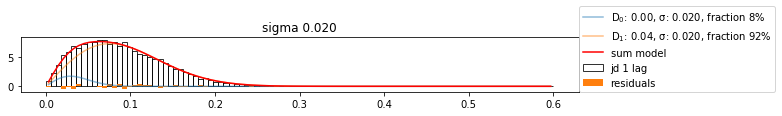

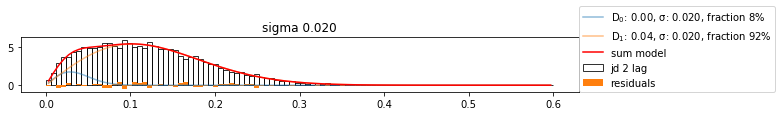

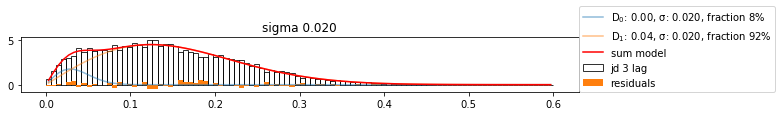

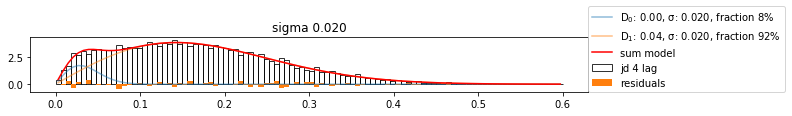

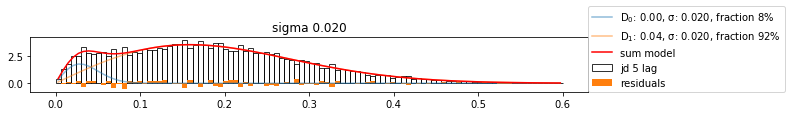

{'sigma': [0.020321318893679597],
 'D': [0.0, 0.040703453152221236],
 'F': [0.08292877992248437, 0.9170712200775156],
 'dt': 0.06,
 'fit_result': <lmfit.minimizer.MinimizerResult at 0x7ff12134f198>,
 'n_tracks': 1000,
 'chi2': 12.607074197703145,
 'chi2_norm': 0.02521414839540629,
 'n_iter': 29,
 'path': None}

In [39]:
fit2.fit_spoton_2_0(sim, n_lags=5, n_bins=100)

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:Total 1000 tracks
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.00186673, 0.04141257]), array([0.05714532, 0.02909622, 0.91375846])), 5 lags


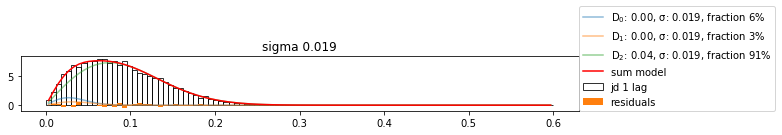

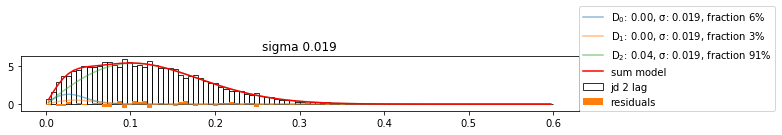

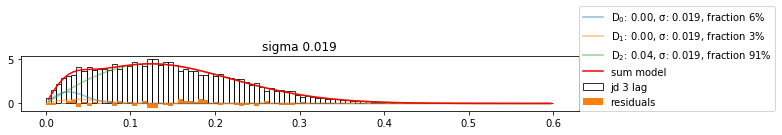

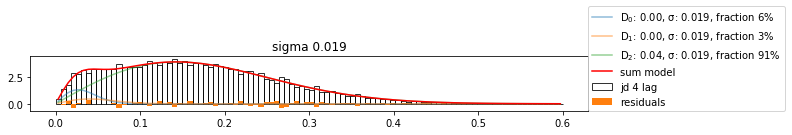

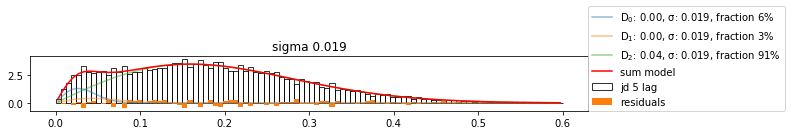

{'sigma': [0.018807117556125227],
 'D': [0.0, 0.001866731602748084, 0.041412573121416996],
 'F': [0.05714532224223923, 0.029096217199285956, 0.9137584605584748],
 'dt': 0.06,
 'fit_result': <lmfit.minimizer.MinimizerResult at 0x7ff117cad5c0>,
 'n_tracks': 1000,
 'chi2': 12.331718415780008,
 'chi2_norm': 0.024663436831560016,
 'n_iter': 205,
 'path': None}

In [40]:
fit2.fit_spoton_2_0(sim, n_lags=5, n_bins=100, D=(0., 0.05, 0.5), fit_D=(0,1,1), F=(0.3,0.4,0.3), fit_F=(1,1,1))

INFO:fastspt.fit2:fit_spoton_2_0: Fit path: None
INFO:fastspt.fit2:Total 2000 tracks
DEBUG:fastspt.fit2:start minimize
INFO:fastspt.fit2:fit_spoton_2_0: Plot fit for (D, F): (array([0.        , 0.01012713, 0.03969306]), array([0.09651538, 0.45143327, 0.45205135])), 5 lags


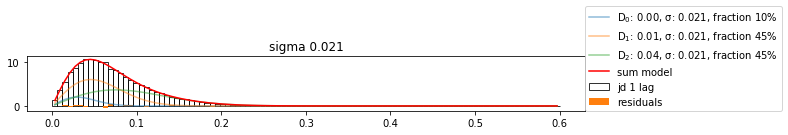

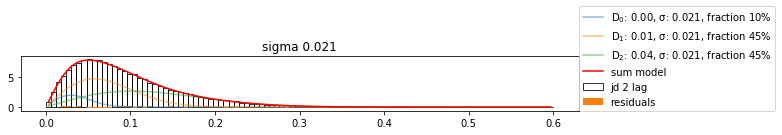

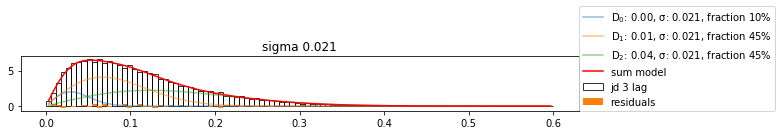

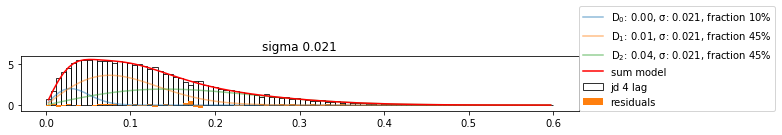

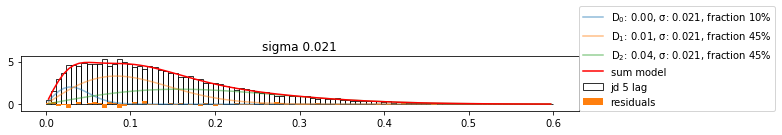

{'sigma': [0.020538420653176456],
 'D': [0.0, 0.010127131760184982, 0.0396930575552239],
 'F': [0.09651538164519213, 0.45143326675615486, 0.452051351598653],
 'dt': 0.06,
 'fit_result': <lmfit.minimizer.MinimizerResult at 0x7ff11514e9b0>,
 'n_tracks': 2000,
 'chi2': 5.531320448835192,
 'chi2_norm': 0.011062640897670385,
 'n_iter': 77,
 'path': None}

In [37]:
fit2.fit_spoton_2_0(sim, n_lags=5, n_bins=100, D=(0., 0.05, 0.5), fit_D=(0,1,1), F=(0.3,0.4,0.3), fit_F=(1,1,1))